In [1]:
#import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") 


plt.style.use('fivethirtyeight') 

In [11]:
#configure API key
quandl.ApiConfig.api_key = 'DjhMgMPM-AHS_fgeHipp'

In [47]:
data=quandl.get("PSE/ANNINC992I_PALL_PH", authtoken="DjhMgMPM-AHS_fgeHipp")

In [48]:
data.shape

(66, 1)

In [49]:
data.columns

Index(['Value'], dtype='object')

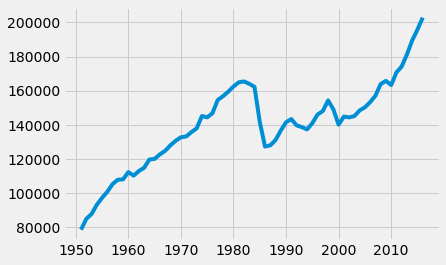

In [55]:
plt.plot(data)

In [50]:
data_2=data.reset_index()

In [51]:
data_2.head()

Date         Value
0 1950-12-31  78609.617188
1 1951-12-31  84919.242188
2 1952-12-31  87806.945312
3 1953-12-31  93196.539062
4 1954-12-31  97260.343750

In [52]:
data_2

Date          Value
0  1950-12-31   78609.617188
1  1951-12-31   84919.242188
2  1952-12-31   87806.945312
3  1953-12-31   93196.539062
4  1954-12-31   97260.343750
..        ...            ...
61 2011-12-31  174181.500000
62 2012-12-31  181229.468750
63 2013-12-31  189445.796875
64 2014-12-31  195752.453125
65 2015-12-31  202781.984375

[66 rows x 2 columns]

In [53]:
data_sub = data_2.loc[(data_2['Date'] >= '1980-01-01')]

Data prior to 1980 is economically irrelevant

In [56]:
data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

Value
datetime                 
1980-12-31  164903.828125
1981-12-31  165408.671875
1982-12-31  164042.671875
1983-12-31  162230.203125
1984-12-31  141735.625000

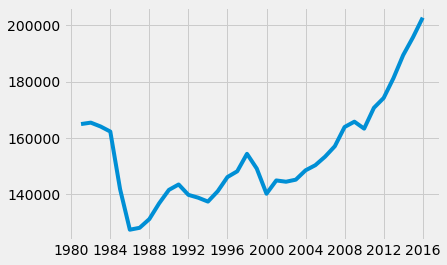

In [57]:
plt.plot(data_sub)

In [58]:
#checking for missing values
data_sub.isnull().sum() 

Value    0
dtype: int64

no missing values

In [59]:
dups = data_sub.duplicated()
dups.sum()

0

no duplicated data

In [60]:
decomposition = sm.tsa.seasonal_decompose(data_sub, model='multiplicative')

In [62]:
from pylab import rcParams 

rcParams['figure.figsize'] = 18, 7

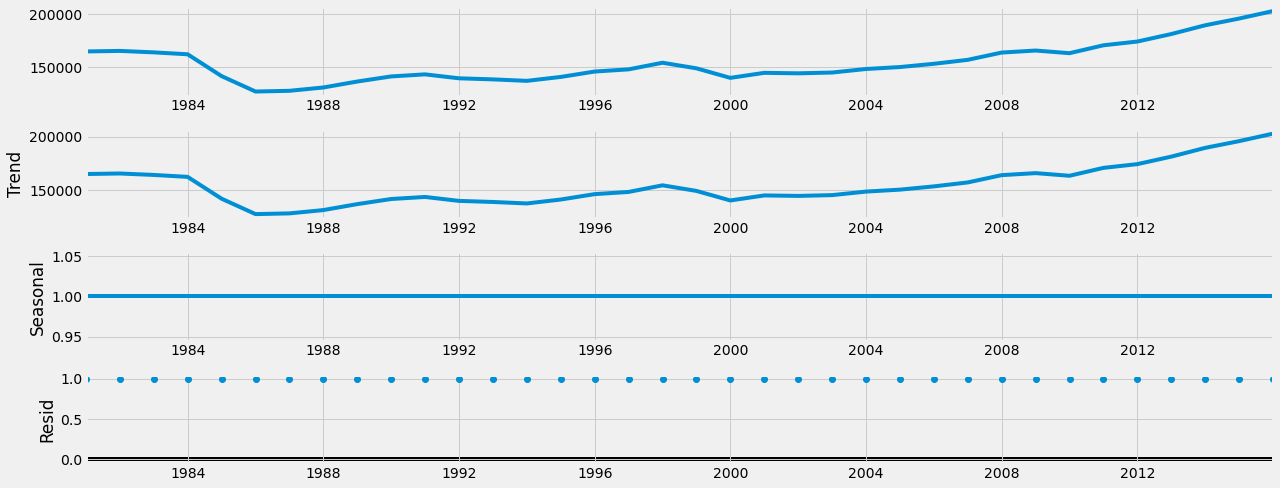

In [63]:

decomposition.plot()
plt.show()

In [64]:
from statsmodels.tsa.stattools import adfuller 
def dickey_fuller(timeseries): 
    
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)


dickey_fuller(data_sub['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  1.984929
p-value                         0.998653
Number of Lags Used             4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


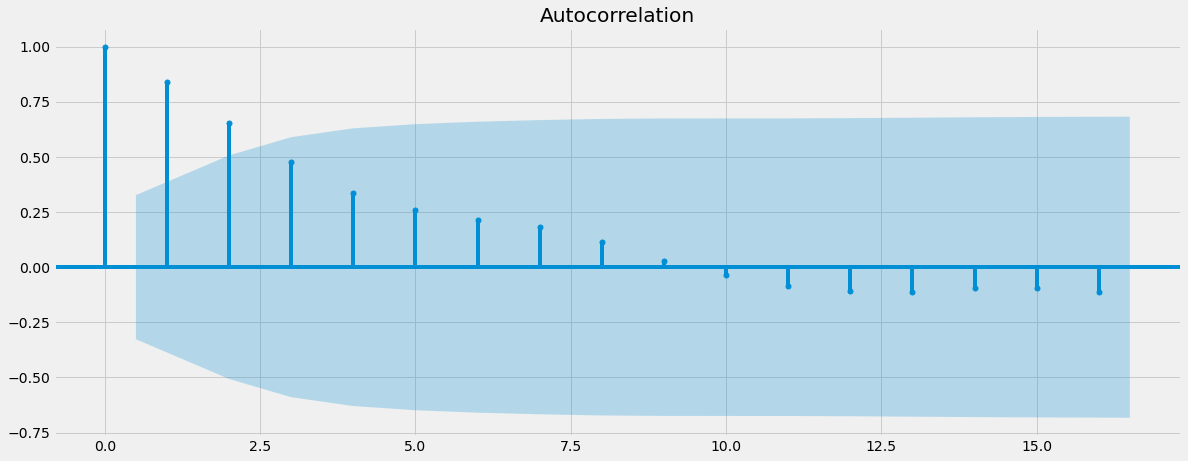

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 

plot_acf(data_sub)
plt.show()

In [66]:
data_diff = data_sub - data_sub.shift(1)

In [67]:
data_diff.dropna(inplace = True)

In [68]:
data_diff.head()

Value
datetime                
1981-12-31    504.843750
1982-12-31  -1366.000000
1983-12-31  -1812.468750
1984-12-31 -20494.578125
1985-12-31 -14429.453125

In [69]:
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [70]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -3.254031
p-value                         0.017063
Number of Lags Used             0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


data now shows stationarity as the test statistic is less than the critical values at 5% and 10%, p-value is less than .05

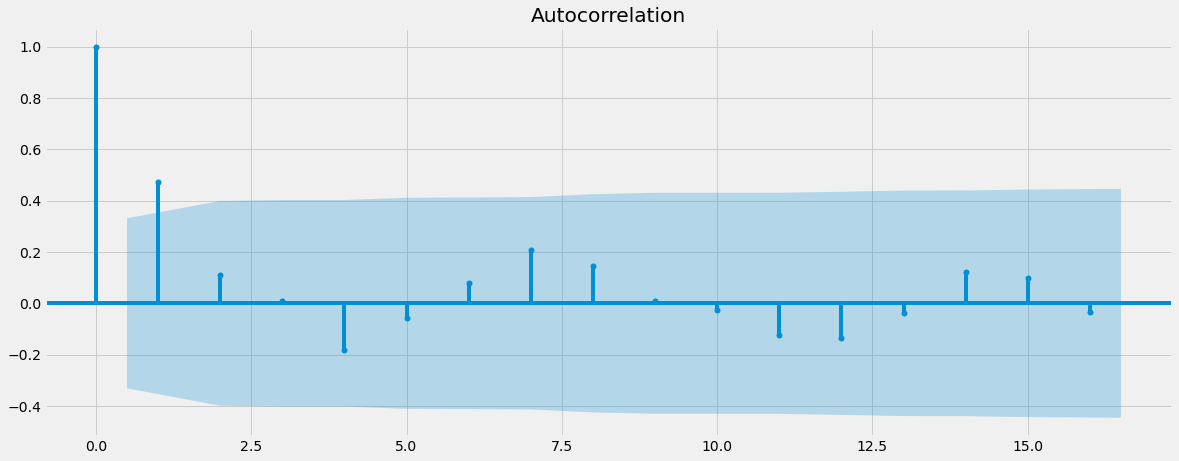

In [71]:
plot_acf(data_diff)
plt.show()

even fewer lags outside the autocorrelation, indication of good stationarity